In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [230]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [232]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Imputing Missing Values

In [233]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can impute numerical columns using mean of this column

In [234]:
avg_age = df['Age'].mean()
avg_age

29.69911764705882

In [235]:
df['Age'].fillna(value=avg_age, inplace=True)
df['Age'].isnull().sum()

0

We can impute non-numerical columns using mode

In [236]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [237]:
embarked_mode = df['Embarked'].mode()[0]
embarked_mode

'S'

In [238]:
df['Embarked'].fillna(value=embarked_mode, inplace=True)
df['Embarked'].isnull().sum()

0

Since Cabin feature has too many missing values we can drop it. Moreover, the columns PassengerId, Name, Ticket are irrelevant feature we can also drop them.

In [239]:
categorical_cols = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
df[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [240]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Categorical Features Encoding

Since machine learning algorithms cannot work well with non-numeric data, encoding them can increase model performance.

First we can encode gender feature

In [241]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [242]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [243]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [244]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
5,0,3,0,29.699118,0,0,8.4583,2
6,0,1,0,54.000000,0,0,51.8625,0


## Outlier Treatment

In [245]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

We're just going to do outlier treatment for these two features, since there are so many unique values ​​in the age and price features. To detect outliers we can use boxplot

<img src = "box_plot.png">

<AxesSubplot:xlabel='Fare'>

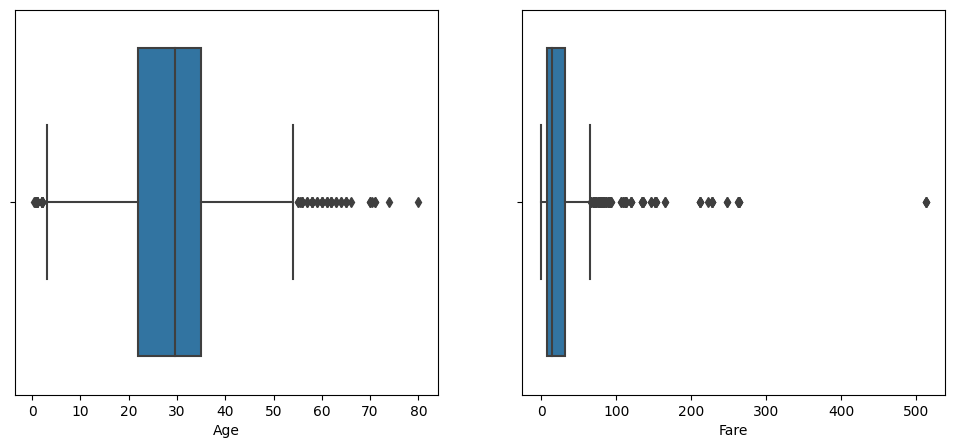

In [246]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df['Age'], ax=ax[0])
sns.boxplot(x=df['Fare'], ax=ax[1])

As we can see the Fare and Age features have outliers

In [247]:
def outlier_treatment(df, feature_name):
    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[feature_name] > lower_bound) & (df[feature_name] < upper_bound)]

In [248]:
df[['Fare', 'Age']].describe()

,Fare,Age
count,891.000000,891.000000
mean,32.204208,29.699118
std,49.693429,13.002015
min,0.000000,0.420000
25%,7.910400,22.000000
50%,14.454200,29.699118
75%,31.000000,35.000000
max,512.329200,80.000000


In [249]:
df = outlier_treatment(df=df, feature_name='Fare')
df = outlier_treatment(df=df, feature_name='Age')

In [250]:
df[['Fare', 'Age']].describe()

,Fare,Age
count,696.000000,696.000000
mean,17.041768,28.655542
std,13.462549,9.067977
min,0.000000,5.000000
25%,7.869800,23.000000
50%,10.500000,29.699118
75%,25.466700,32.000000
max,65.000000,51.000000


## Seperating Features

In [251]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X.shape, y.shape

((696, 7), (696,))

In [252]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
5,3,0,29.699118,0,0,8.4583,2


In [253]:
y.head()

0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

## Scaling Data

In [254]:
# MinMaxScaler will scale down all the features in between 0 and 1
scaler = MinMaxScaler()

# Fit to data, then transform it.
X_scaled = scaler.fit_transform(X)

# Since fit_transform returns an array, we need to convert to DataFrame
X = pd.DataFrame(X_scaled, columns = X.columns)

X.head(7)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.369565,0.2,0.000000,0.111538,0.0
1,1.0,1.0,0.456522,0.0,0.000000,0.121923,0.0
2,0.0,1.0,0.652174,0.2,0.000000,0.816923,0.0
3,1.0,0.0,0.652174,0.0,0.000000,0.123846,0.0
4,1.0,0.0,0.536937,0.0,0.000000,0.130128,1.0
5,1.0,1.0,0.478261,0.0,0.333333,0.171282,0.0
6,0.5,1.0,0.195652,0.2,0.000000,0.462628,0.5


In [255]:
# Split arrays or matrices into random train and test subsets.
# X is all of our features, y is the target
# stratify make sure that the distribution of the target class in both training and test data is equal
# so both training and test data will have equal propotion of positive and negative classes.
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 56, stratify=y)

In [256]:
model = KNeighborsClassifier(n_neighbors=10)

# Fit the model
model.fit(train_X, train_y)

# Predict over the Train Set and calculating F1
test_predict = model.predict(test_X)
f1 = f1_score(test_predict, test_y)
print('Test F1 Score: {}'.format(f1))

Test F1 Score: 0.7307692307692306
